In [1]:
# Libraries 
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# So the notebook doesn't yell at me
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Zillow .py stuff and functions
#from acquire 
#from prepare 

#Some stuff I might have forgotten
#import env
#from env import user, password, host
from scipy import stats



# sklearn modeling stuff
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SequentialFeatureSelector
from sklearn.model_selection import train_test_split
#from evaluate import select_kbest_feature_engineering, rfe_feature_engineering
#from evaluate import scaled_data, assessed_value_regression_plot, baseline_vs_model_regression
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split

from math import sqrt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor



# Acquisition
- read from url csv

In [2]:
df = pd.read_csv('https://query.data.world/s/r6psulerzbz7pdb2vctbrfig5rx6fi')
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [3]:
df.shape

(1586614, 13)

In [4]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [5]:
df.describe().T
# The average of the beer_abv column seems high. I will have to check for outliers.

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586614.0,3.130099e+03,5.578104e+03,1.000000e+00,1.430000e+02,4.290000e+02,2.372000e+03,2.800300e+04
review_time,1586614.0,1.224089e+09,7.654427e+07,8.406720e+08,1.173224e+09,1.239203e+09,1.288568e+09,1.326285e+09
review_overall,1586614.0,3.815581e+00,7.206219e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_aroma,1586614.0,3.735636e+00,6.976167e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_appearance,1586614.0,3.841642e+00,6.160928e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palate,1586614.0,3.743701e+00,6.822184e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_taste,1586614.0,3.792860e+00,7.319696e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
beer_abv,1518829.0,7.042387e+00,2.322526e+00,1.000000e-02,5.200000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerid,1586614.0,2.171279e+04,2.181834e+04,3.000000e+00,1.717000e+03,1.390600e+04,3.944100e+04,7.731700e+04


In [6]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [7]:
df.max()

brewery_id                         28003
review_time                   1326285348
review_overall                       5.0
review_aroma                         5.0
review_appearance                    5.0
beer_style                       Witbier
review_palate                        5.0
review_taste                         5.0
beer_name            葉山ビール (Hayama Beer)
beer_abv                            57.7
beer_beerid                        77317
dtype: object

# Preparation 

- Consider dropping review_time, beer_beerid and review_profilename column
- See if you can get the average of the styles 

In [8]:
# Drop useless columns

df = df.drop(columns=['review_time', 'beer_beerid', 'review_profilename'])
df.head()

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
0,10325,Vecchio Birraio,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0
1,10325,Vecchio Birraio,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2
2,10325,Vecchio Birraio,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5
3,10325,Vecchio Birraio,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0
4,1075,Caldera Brewing Company,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7


In [9]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_overall', 'review_aroma',
       'review_appearance', 'beer_style', 'review_palate', 'review_taste',
       'beer_name', 'beer_abv'],
      dtype='object')

In [10]:
df.dtypes

brewery_id             int64
brewery_name          object
review_overall       float64
review_aroma         float64
review_appearance    float64
beer_style            object
review_palate        float64
review_taste         float64
beer_name             object
beer_abv             float64
dtype: object

In [21]:
#

df = df[df["beer_abv"] <= 15.0]

df.columns.max()

'review_taste'

# Exploration

Univariate up first
- We'll explore our variables with visualizations.

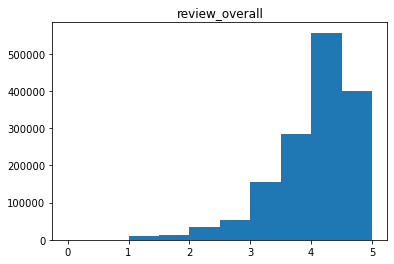

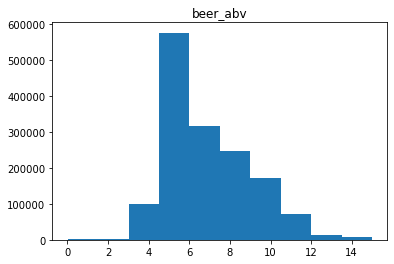

In [20]:
continuous_variables = ['brewery_id', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']


plt.hist(df['review_overall'])
plt.title('review_overall')
plt.show()

plt.hist(df['beer_abv'])
plt.title('beer_abv')
plt.show()

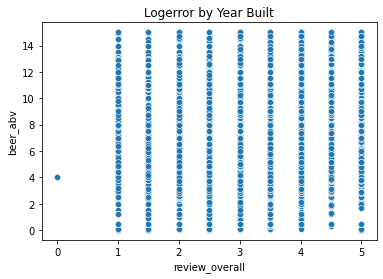